# Part I - (Mobile sensory data Data Exploration and Visualization)
## by (Robertson Otoo Asare)

## Introduction
> Mobile sensory data enables the research and development of algorithms and solutions to many problems. The dataset provided here contains data from 60 users (also referred to as subjects or participants), each identified with a universally unique identifier (UUID). From every user, it has thousands of examples, typically taken in intervals of 1 minute (but not necessarily in one long sequence, as there are time gaps). Every example contains measurements from sensors (from the user's personal smartphone and from a smartwatch that we provided). Most examples also have context labels self-reported by the user.
 <a href = 'https://drive.google.com/file/d/1-AyizDvWkVVsp_NjCYXp_h5PbbPVlQ7B/view?usp=sharing'>Download here<a/>


## Preliminary Wrangling

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

##### Reading in participant one csv

In [2]:
df = pd.read_csv("0A986513-7828-4D53-AA1F-E02D6DF9561B.features_labels.csv")

#### Test

In [3]:
# Checking the lenght of the first participant
len(df)

3960

##### Reading all 60 participants using glop library

In [4]:
path = '/home/bobby/Downloads/Data Science Challenge/Extrasensory'
df = pd.concat(map(pd.read_csv, glob.glob(path + "/*.csv")))

#### Test

In [5]:
# checking the length of all 60 participant
len(df)

377346

In [6]:
# Display the first five rows of the DataFrame .head
df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1464302284,1.004543,0.059116,0.061962,0.103348,0.981003,1.000137,1.023967,1.946661,6.682911,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2
1,1464302341,1.003282,0.065007,0.055984,0.110693,0.970995,1.001534,1.032067,1.974543,6.682530,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2
2,1464302394,1.007147,0.005321,0.006711,0.015132,1.005402,1.006897,1.008356,0.823940,6.684598,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2
3,1464302461,1.008190,0.005342,0.005158,0.014643,1.006742,1.008178,1.009487,0.832251,6.684598,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2
4,1464302514,1.007349,0.019055,-0.026959,0.059747,1.004504,1.007168,1.009583,0.467432,6.684428,...,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2


In [7]:
# Display a basic summary of the DataFrame using .info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377346 entries, 0 to 7541
Columns: 278 entries, timestamp to label_source
dtypes: float64(276), int64(2)
memory usage: 803.2 MB


In [8]:
#Display the count of missing values in the dataset
df.isnull().sum()

timestamp                               0
raw_acc:magnitude_stats:mean          290
raw_acc:magnitude_stats:std           290
raw_acc:magnitude_stats:moment3       290
raw_acc:magnitude_stats:moment4       290
                                    ...  
label:PHONE_IN_BAG                 284884
label:PHONE_ON_TABLE               214923
label:WITH_CO-WORKERS              265282
label:WITH_FRIENDS                 211932
label_source                            0
Length: 278, dtype: int64

In [9]:
print(df.describe())

          timestamp  raw_acc:magnitude_stats:mean  \
count  3.773460e+05                 377056.000000   
mean   1.445839e+09                      1.002223   
std    5.907009e+06                      0.079623   
min    1.433537e+09                      0.018148   
25%    1.441438e+09                      0.992556   
50%    1.444974e+09                      1.001258   
75%    1.448696e+09                      1.012745   
max    1.464899e+09                      3.185837   

       raw_acc:magnitude_stats:std  raw_acc:magnitude_stats:moment3  \
count                377056.000000                    377056.000000   
mean                      0.038832                         0.037772   
std                       0.096109                         0.113198   
min                       0.000030                        -0.493806   
25%                       0.001709                        -0.000785   
50%                       0.003265                         0.000772   
75%                      

In [10]:
# Checking for duplicates
df.duplicated().sum()

0

In [11]:
# Print all columns
print(df.columns.tolist())

['timestamp', 'raw_acc:magnitude_stats:mean', 'raw_acc:magnitude_stats:std', 'raw_acc:magnitude_stats:moment3', 'raw_acc:magnitude_stats:moment4', 'raw_acc:magnitude_stats:percentile25', 'raw_acc:magnitude_stats:percentile50', 'raw_acc:magnitude_stats:percentile75', 'raw_acc:magnitude_stats:value_entropy', 'raw_acc:magnitude_stats:time_entropy', 'raw_acc:magnitude_spectrum:log_energy_band0', 'raw_acc:magnitude_spectrum:log_energy_band1', 'raw_acc:magnitude_spectrum:log_energy_band2', 'raw_acc:magnitude_spectrum:log_energy_band3', 'raw_acc:magnitude_spectrum:log_energy_band4', 'raw_acc:magnitude_spectrum:spectral_entropy', 'raw_acc:magnitude_autocorrelation:period', 'raw_acc:magnitude_autocorrelation:normalized_ac', 'raw_acc:3d:mean_x', 'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z', 'raw_acc:3d:std_x', 'raw_acc:3d:std_y', 'raw_acc:3d:std_z', 'raw_acc:3d:ro_xy', 'raw_acc:3d:ro_xz', 'raw_acc:3d:ro_yz', 'proc_gyro:magnitude_stats:mean', 'proc_gyro:magnitude_stats:std', 'proc_gyro:magnitude_stat

In [12]:
df.columns.values

array(['timestamp', 'raw_acc:magnitude_stats:mean',
       'raw_acc:magnitude_stats:std', 'raw_acc:magnitude_stats:moment3',
       'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       'raw_acc:magnitude_spectrum:log_energy_band0',
       'raw_acc:magnitude_spectrum:log_energy_band1',
       'raw_acc:magnitude_spectrum:log_energy_band2',
       'raw_acc:magnitude_spectrum:log_energy_band3',
       'raw_acc:magnitude_spectrum:log_energy_band4',
       'raw_acc:magnitude_spectrum:spectral_entropy',
       'raw_acc:magnitude_autocorrelation:period',
       'raw_acc:magnitude_autocorrelation:normalized_ac',
       'raw_acc:3d:mean_x', 'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z',
       'raw_acc:3d:std_x', 'raw_acc:3d:std_y', 'raw_acc:3d:std_z',
       'raw_acc:3d:ro_xy', 

In [13]:
#specify that all columns should be shown
pd.set_option('max_columns', None)
#view DataFrame
df

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

## Cleaning Data


#### ISSUES

* Defining features
* Defining context labels
* Identifying relationship between features and context labels
* Identifying relationship between labels
* Select the features to work with for target label
* Defining 1 target labels to work with.
* Cleaning missing labels and replacing NaN values with dataset samples

In [14]:
# making a copy of df
df_clean = df.copy()

##### Extracting relevant columns

In [15]:
#This extracts the last column
last_column=df_clean.iloc[:,-1]

In [16]:
last_column

0       2
1       2
2       2
3       2
4       2
       ..
7537    2
7538    2
7539    2
7540    2
7541    2
Name: label_source, Length: 377346, dtype: int64

In [17]:
last_column.value_counts()

 2    263080
-1     69026
 1     23314
 6     10921
 4      6996
 5      3239
 0       606
 3       164
Name: label_source, dtype: int64

##### Extracting all labels

In [18]:
#### extracting all labels
all_labels = df.iloc[: , -50:]

In [19]:
print(all_labels)

      label:FIX_walking  label:FIX_running  label:BICYCLING  label:SLEEPING  \
0                   0.0                0.0              0.0             0.0   
1                   0.0                0.0              0.0             0.0   
2                   0.0                0.0              0.0             0.0   
3                   0.0                0.0              0.0             0.0   
4                   0.0                0.0              0.0             0.0   
...                 ...                ...              ...             ...   
7537                1.0                NaN              NaN             0.0   
7538                1.0                NaN              NaN             0.0   
7539                1.0                NaN              NaN             0.0   
7540                1.0                NaN              NaN             0.0   
7541                1.0                NaN              NaN             0.0   

      label:LAB_WORK  label:IN_CLASS  label:IN_A_ME

#### Issues

* Present of NaN in labels

In [20]:
# Deleting the tiimestamp column
del df_clean['timestamp']

#### Test

In [21]:
df_clean

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch

#### Extrcating all features

In [22]:
x = df_clean.iloc[:, :-52]

In [23]:
x

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch

In [24]:
# Checking for nulls in features
x.isnull().sum()

raw_acc:magnitude_stats:mean            290
raw_acc:magnitude_stats:std             290
raw_acc:magnitude_stats:moment3         290
raw_acc:magnitude_stats:moment4         290
raw_acc:magnitude_stats:percentile25    290
                                       ... 
discrete:time_of_day:between9and15        0
discrete:time_of_day:between12and18       0
discrete:time_of_day:between15and21       0
discrete:time_of_day:between18and24       0
discrete:time_of_day:between21and3        0
Length: 225, dtype: int64

In [25]:
x.fillna(0)

,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_band1,watch

#### Preparing labels for prediction

In [76]:
### Inspecting label when participant is running
df["label:FIX_running"].value_counts()

0.0    139780
1.0      1090
Name: label:FIX_running, dtype: int64

#### Defining 1 target labels to work with.

In [48]:
label_running = df["label:FIX_running"]

In [83]:
## Selecting desired features

In [36]:
x_feature = df[['discrete:time_of_day:between9and15','discrete:time_of_day:between12and18', 
                'discrete:time_of_day:between15and21', 'discrete:time_of_day:between18and24', 
                'discrete:time_of_day:between21and3']]

In [66]:
x_feature.value_counts()

discrete:time_of_day:between9and15  discrete:time_of_day:between12and18  discrete:time_of_day:between15and21  discrete:time_of_day:between18and24  discrete:time_of_day:between21and3
0.0                                 0.0                                  0.0                                  0.0                                  0.0                                   64452
                                                                                                                                                   1.0                                   57086
                                    1.0                                  1.0                                  0.0                                  0.0                                   54453
                                    0.0                                  1.0                                  1.0                                  0.0                                   53326
1.0                                 1.0               

#### MACHINE LEARNING

In [60]:
## importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

#### Split Features and Labels

In [49]:
train_features,test_features, train_labels,test_labels =train_test_split(x_feature, label_running )

In [51]:
## scale the feature data so that it has a mean 0f zero and standard deviation one (Normalize)
scaler = StandardScaler()

In [54]:
train_features = scaler.fit_transform(train_features)

In [55]:
test_features = scaler.transform(test_features)

### Create and trian the model

In [61]:
model = RandomForestClassifier()

In [64]:
model.fit(train_features, train_labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Univariate Exploration

###### A couple of plots to explore some features


In [71]:
plt.rcParams['figure.figsize'] = 8, 6
base_color = sb.color_palette('colorblind')[0]

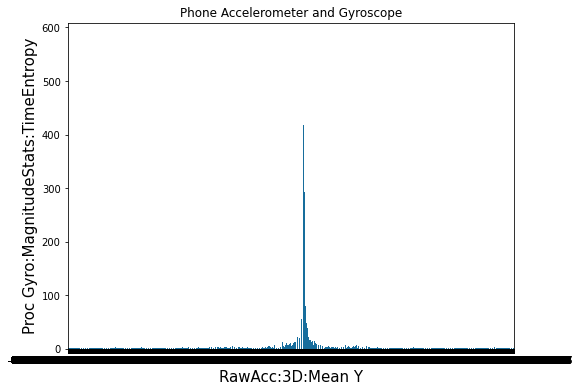

In [72]:
sb.countplot(data=df, x='proc_gyro:3d:mean_x', color=base_color);
plt.title("Phone Accelerometer and Gyroscope")
plt.xlabel('RawAcc:3D:Mean Y', fontsize = 15);
plt.ylabel('Proc Gyro:MagnitudeStats:TimeEntropy', fontsize = 15);

**insight:** From the plot the acceleration mean of Y as against gyroscope is normally distributed

## Bivariate Exploration

> In this section, I investigated relationships between pairs of variables in some
features. 

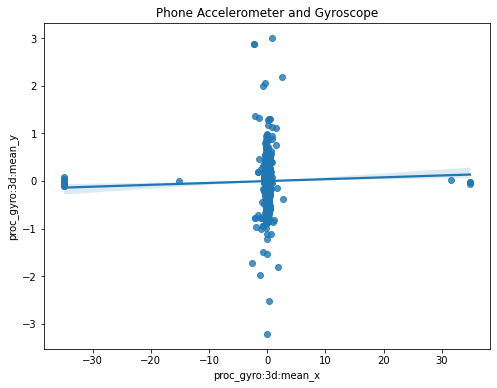

In [16]:
sb.regplot(x=df["proc_gyro:3d:mean_x"], y=df["proc_gyro:3d:mean_y"])
plt.xlabel("proc_gyro:3d:mean_x")
plt.ylabel("proc_gyro:3d:mean_y")
plt.title("Smart watch Accelerometr: Walking")
plt.show()

**Insights:** There seems to be a weak corrletaion between the gyroscope mean_x and gyroscope mean_y

In [1]:
plt.figure(figsize=[8, 6]);
sb.countplot(data=df, x='raw_acc:magnitude_stats:mean', hue='label:FIX_running');
plt.title("A plot showing the lABEL RUNNING and raw_acc:magnitude_stats:mean")
plt.xlabel('Hour of Day', fontsize = 12);
plt.ylabel('Count', fontsize = 12);

NameError: name 'plt' is not defined